García López Luis

Montero Barraza Álvaro David

In [63]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import pathlib
import matplotlib. pyplot as plt
import pandas as pd
import seaborn as sns
print_function
print(tf.__version__)


2.15.0


In [64]:

dataset_path = keras.utils.get_file('auto-mpg.data',"http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/alvaromontero/.keras/datasets/auto-mpg.data'

In [65]:
column_names = ['MPG' , 'Cylinders' , 'Displacement' , 'Horsepower' , 'Height' ,
'Acceleration', 'Model Year' ,
'Origin']
raw_dataset = pd.read_csv(dataset_path,names=column_names,
                          na_values="?",comment='\t',
                          sep=" ",skipinitialspace=True)
dataset =raw_dataset.copy()
dataset. tail(15)

,MPG,Cylinders,Displacement,Horsepower,Height,Acceleration,Model Year,Origin
383,38.0,4,91.0,67.0,1965.0,15.0,82,3
384,32.0,4,91.0,67.0,1965.0,15.7,82,3
385,38.0,4,91.0,67.0,1995.0,16.2,82,3
386,25.0,6,181.0,110.0,2945.0,16.4,82,1
387,38.0,6,262.0,85.0,3015.0,17.0,82,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1


In [66]:
print(len(dataset))
for col in column_names:
    columna_deseada = col  
    valor_minimo = dataset[columna_deseada].min()
    valor_maximo = dataset[columna_deseada].max()
    print(f"Valor mínimo de '{columna_deseada}':", valor_minimo)
    print(f"Valor máximo de '{columna_deseada}':", valor_maximo)
# Obtener el valor mínimo y máximo de la columna deseada


398
Valor mínimo de 'MPG': 9.0
Valor máximo de 'MPG': 46.6
Valor mínimo de 'Cylinders': 3
Valor máximo de 'Cylinders': 8
Valor mínimo de 'Displacement': 68.0
Valor máximo de 'Displacement': 455.0
Valor mínimo de 'Horsepower': 46.0
Valor máximo de 'Horsepower': 230.0
Valor mínimo de 'Height': 1613.0
Valor máximo de 'Height': 5140.0
Valor mínimo de 'Acceleration': 8.0
Valor máximo de 'Acceleration': 24.8
Valor mínimo de 'Model Year': 70
Valor máximo de 'Model Year': 82
Valor mínimo de 'Origin': 1
Valor máximo de 'Origin': 3


In [67]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Height          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [68]:
dataset=dataset.dropna()

In [69]:
Origin = dataset.pop( 'Origin')


In [70]:
"""from tensorflow.keras.utils import to_categorical
origin_encoded = to_categorical(Origin, num_classes=3)

# Crear nuevas columnas en el DataFrame
dataset['USA'] = origin_encoded[:, 0]
dataset['Europe'] = origin_encoded[:, 1]
dataset['Japan'] = origin_encoded[:, 2]
dataset.pop('Origin')
dataset.tail()"""
dataset[ 'USA'] =(Origin==1)*1.0
dataset['Europe']=(Origin==2)*1.0
dataset['Japan']=(Origin==3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Height,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [71]:
train_dataset = dataset.sample(frac=.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)
train_dataset.keys()


Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Height',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [72]:
train_dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Height,Acceleration,Model Year,USA,Europe,Japan
281,19.8,6,200.0,85.0,2990.0,18.2,79,1.0,0.0,0.0
229,16.0,8,400.0,180.0,4220.0,11.1,77,1.0,0.0,0.0
150,26.0,4,108.0,93.0,2391.0,15.5,74,0.0,0.0,1.0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0.0,0.0,1.0
182,28.0,4,107.0,86.0,2464.0,15.5,76,0.0,1.0,0.0


In [73]:
test_dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Height,Acceleration,Model Year,USA,Europe,Japan
369,34.0,4,112.0,88.0,2395.0,18.0,82,1.0,0.0,0.0
375,36.0,4,105.0,74.0,1980.0,15.3,82,0.0,1.0,0.0
382,34.0,4,108.0,70.0,2245.0,16.9,82,0.0,0.0,1.0
384,32.0,4,91.0,67.0,1965.0,15.7,82,0.0,0.0,1.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


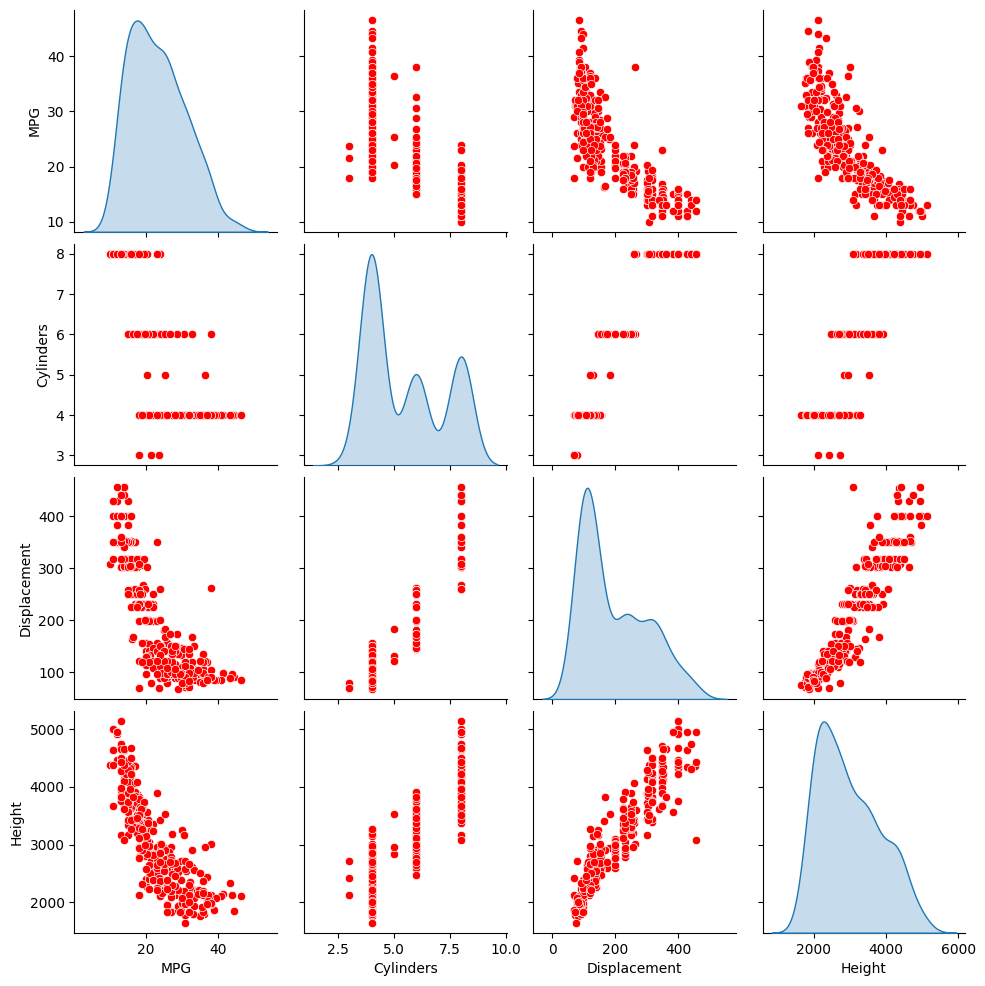

In [74]:
variables = ["MPG", "Cylinders", "Displacement", "Height"]


sns.pairplot(train_dataset[variables], diag_kind="kde", plot_kws={'color':'red'})


In [75]:
train_stats=train_dataset.describe()
train_stats.pop('MPG')
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Height,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [76]:
train_labels=train_dataset.pop('MPG')#Separar los labels que nos interesan
test_labels=test_dataset.pop('MPG')


In [77]:
def norm(x):#Normalizar el datase
    return(x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [78]:
train_stats=normed_train_data.describe()
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,1.824443e-16,1.0,-1.457657,-0.869348,-0.869348,1.483887,1.483887
Displacement,314.0,8.627211e-17,1.0,-1.220325,-0.860894,-0.424785,0.675074,2.489002
Horsepower,314.0,-9.900078e-18,1.0,-1.545283,-0.751241,-0.272190,0.607162,3.153347
Height,314.0,-8.485781e-17,1.0,-1.589352,-0.869478,-0.198782,0.732017,2.547401
Acceleration,314.0,-5.148041e-16,1.0,-2.710152,-0.630725,-0.021237,0.588250,3.313017
Model Year,314.0,9.772791e-16,1.0,-1.604642,-0.788458,0.027726,0.843910,1.660094
USA,314.0,7.920062e-17,1.0,-1.286751,-1.286751,0.774676,0.774676,0.774676
Europe,314.0,1.980016e-17,1.0,-0.465148,-0.465148,-0.465148,-0.465148,2.143005
Japan,314.0,5.374328e-17,1.0,-0.495225,-0.495225,-0.495225,-0.495225,2.012852


In [79]:
model=keras.Sequential([#Modelo secuencial
    layers.Dense(64,activation='relu',input_shape=(normed_train_data.shape[1],)),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
])

In [80]:
optimizer = keras.optimizers.RMSprop(.001)
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])

In [81]:
import os
os.environ["PATH"] += os.pathsep + r"D:\Graphviz\bin"
model.summary()
plot_model(model,to_file='D:\Repositorios\Deep_Learning\RN\P2',
           show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
class print_dot(keras.callbacks.Callback):#Para imprimir el deslizador
    def on_epoch_end(self,epoch,logs):
        if epoch%100==0:print(' ')
        print('.',end='')
epochs=1000


In [83]:
history=model.fit(normed_train_data,train_labels,epochs=1000,validation_data=(normed_test_data,test_labels), verbose=1,callbacks=[print_dot()])

Epoch 1/1000
10/10 [==============================] - 0s 11ms/step - loss: 546.6464 - mae: 22.0831 - mse: 546.6464 - val_loss: 530.6736 - val_mae: 21.6824 - val_mse: 530.6736
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 464.9419 - mae: 20.2922 - mse: 464.9419 - val_loss: 444.8141 - val_mae: 19.7891 - val_mse: 444.8141
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 383.5466 - mae: 18.3538 - mse: 383.5466 - val_loss: 356.3294 - val_mae: 17.6038 - val_mse: 356.3294
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 300.2909 - mae: 16.0920 - mse: 300.2909 - val_loss: 266.4105 - val_mae: 15.0797 - val_mse: 266.4105
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 219.5128 - mae: 13.4425 - mse: 219.5128 - val_loss: 185.2389 - val_mae: 12.3718 - val_mse: 185.2389
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 149.6561 - mae: 10.7237 - mse: 149.6561 - val_loss: 119

In [84]:
test_mae = model.evaluate(normed_test_data,test_labels)#Evaluacion del modelo

#print('Test mse:', test_mse)
print('Test mae:', test_mae)

3/3 [==============================] - 0s 2ms/step - loss: 5.4920 - mae: 1.8072 - mse: 5.4920
Test mae: [5.491982460021973, 1.807226300239563, 5.491982460021973]


In [85]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 573.8819042742252)

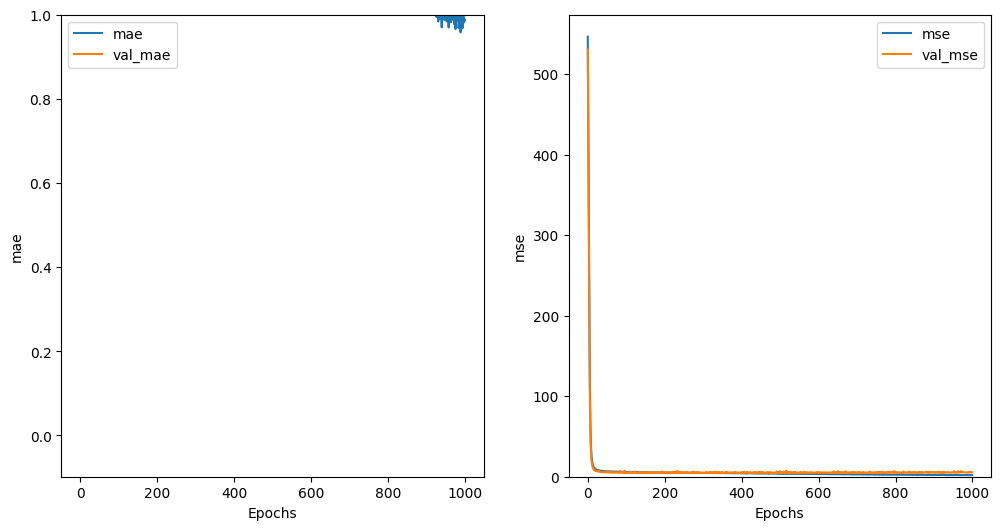

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'mae')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'mse')
plt.ylim(0, None)


In [88]:
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail(10
          )

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
990,1.952126,0.965975,1.952126,5.228251,1.775217,5.228251,990
991,2.032639,0.970026,2.032639,5.265344,1.790453,5.265344,991
992,2.032233,1.019806,2.032233,5.351695,1.790171,5.351695,992
993,2.046664,0.968055,2.046664,6.131220,1.908485,6.131220,993
994,1.960585,0.981805,1.960585,5.549182,1.815746,5.549182,994
995,2.123579,1.021253,2.123579,5.586526,1.795395,5.586526,995
996,2.105138,0.997306,2.105138,5.467042,1.815870,5.467042,996
997,1.970988,0.981939,1.970988,5.612193,1.766655,5.612193,997
998,1.965713,0.990102,1.965713,5.270884,1.782133,5.270884,998
999,2.042935,0.986498,2.042935,5.491982,1.807226,5.491982,999


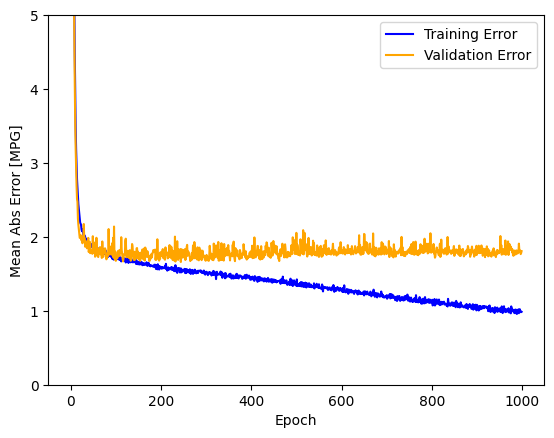

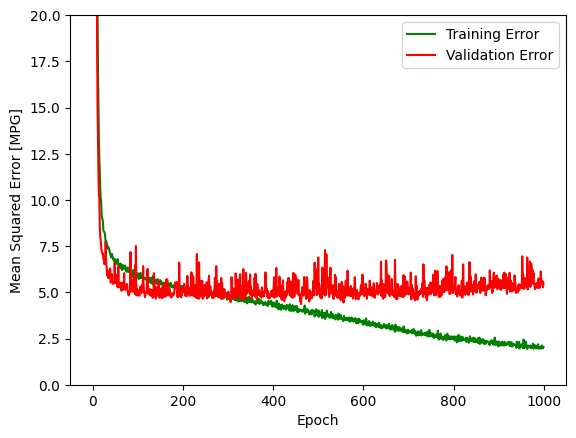

In [90]:
def plot_history(history):#Plotear los errores de entrenamiento y validacion a lo largo de las epocas
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Training Error', color='blue')
    plt.plot(hist['epoch'], hist['val_mae'], label='Validation Error', color='orange')
    plt.ylim([0, 5])
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error [MPG]')
    plt.plot(hist['epoch'], hist['mse'], label='Training Error', color='green')
    plt.plot(hist['epoch'], hist['val_mse'], label='Validation Error', color='red')
    plt.ylim([0, 20])
    plt.legend()
    plt.show()
plot_history(history)

In [91]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history=model.fit(normed_train_data,train_labels,epochs=1000,validation_data=(normed_test_data,test_labels), verbose=1,callbacks=[early_stop,print_dot()])

Epoch 1/1000
10/10 [==============================] - 0s 6ms/step - loss: 2.0833 - mae: 1.0029 - mse: 2.0833 - val_loss: 6.8054 - val_mae: 1.9269 - val_mse: 6.8054
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.9424 - mae: 0.9671 - mse: 1.9424 - val_loss: 5.5893 - val_mae: 1.8392 - val_mse: 5.5893
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.0122 - mae: 0.9996 - mse: 2.0122 - val_loss: 5.5376 - val_mae: 1.8208 - val_mse: 5.5376
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.9798 - mae: 0.9613 - mse: 1.9798 - val_loss: 5.9142 - val_mae: 1.8069 - val_mse: 5.9142
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 2.1069 - mae: 1.0018 - mse: 2.1069 - val_loss: 5.4349 - val_mae: 1.8063 - val_mse: 5.4349
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 1.9762 - mae: 0.9728 - mse: 1.9762 - val_loss: 5.2501 - val_mae: 1.7814 - val_mse: 5.2501
Epoch 7/1000
10/

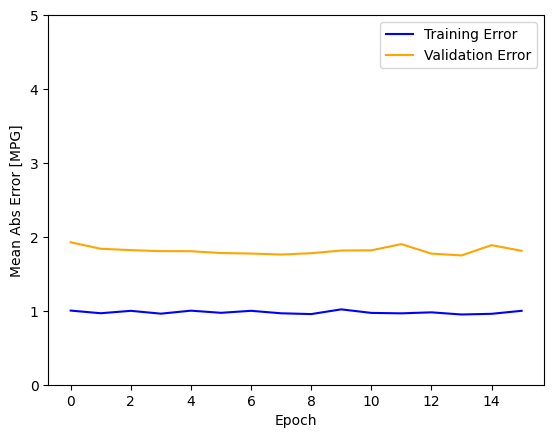

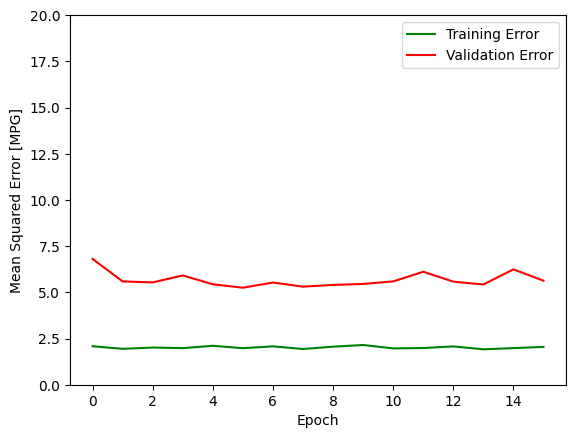

In [92]:
plot_history(history)

In [94]:
loss,mae,mse = model.evaluate(normed_test_data,test_labels)#Evaluacion del modelo
print("Test set MAE: {:5.2f} MPG".format(mae))

3/3 [==============================] - 0s 2ms/step - loss: 5.6296 - mae: 1.8119 - mse: 5.6296
Test set MAE:  1.81 MPG


Predicciones


3/3 [==============================] - 0s 1ms/step


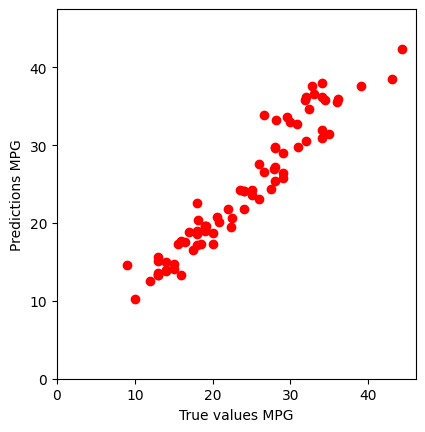

In [100]:
test_predictions=model.predict(normed_test_data).flatten()
plt.scatter(test_labels,test_predictions,c='red')
plt.xlabel('True values MPG')
plt.ylabel('Predictions MPG')
plt.axis('equal')
plt.axis('square')
plt.xlim(0,plt.xlim()[1])
plt.ylim(0,plt.ylim()[1])
_=plt.plot(([-100,100],[-100,100]),c='violet')


Text(0, 0.5, 'Count')

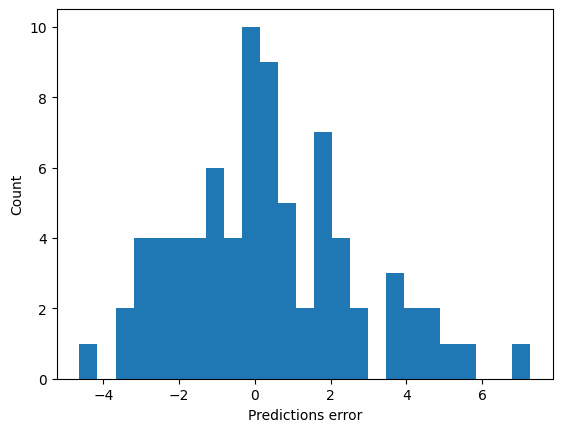

In [101]:
error=test_predictions-test_labels
plt.hist(error,bins=25)
plt.xlabel("Predictions error")
plt.ylabel("Count")